In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [89]:
database = pd.read_csv('Breast_GSE70947.csv')
database.head()

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,lincRNA:chr4:77860976-77869926_F,NM_152343,NM_001005327,NM_001039355,lincRNA:chr21:44456656-44468556_R,lincRNA:chr9:4869500-4896050_F,NM_016053,NM_001080425,ENST00000555638,ENST00000508993
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,normal,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,7.570363,6.368684,4.784042,10.747723,5.090500,5.994149,10.649336,8.969439,4.985693,5.090500
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,normal,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,7.903335,5.713115,4.421074,11.299200,4.447052,4.421074,10.746854,8.174489,4.464177,4.536891
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,normal,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,7.705765,6.595364,4.410870,10.576807,5.003699,6.529257,10.430034,8.473468,4.668447,5.084127
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,normal,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,6.633058,5.786781,4.572984,11.175090,4.990888,6.669871,11.110395,8.880818,4.537626,4.648655
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,normal,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,6.211581,5.538635,4.613828,12.014365,4.979883,6.414621,10.909805,9.526500,4.670490,4.613828


In [90]:
#database.describe()

In [91]:
database.shape

(289, 35983)

In [92]:
# split the data into train and test
database = database.drop('samples', axis=1)
X = database.drop('type', axis=1)
y = database['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN - k-nearest neighbors

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn_classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [95]:
predictions = knn_classifier.predict(X_test)
predictions

array(['normal', 'breast_adenocarcinoma', 'breast_adenocarcinoma',
       'normal', 'breast_adenocarcinoma', 'normal', 'normal',
       'breast_adenocarcinoma', 'normal', 'normal',
       'breast_adenocarcinoma', 'normal', 'normal',
       'breast_adenocarcinoma', 'normal', 'normal', 'normal',
       'breast_adenocarcinoma', 'breast_adenocarcinoma', 'normal',
       'normal', 'normal', 'normal', 'breast_adenocarcinoma', 'normal',
       'breast_adenocarcinoma', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'breast_adenocarcinoma',
       'breast_adenocarcinoma', 'breast_adenocarcinoma', 'normal',
       'normal', 'normal', 'normal', 'normal', 'breast_adenocarcinoma',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'breast_adenocarcinoma', 'breast_adenocarcinoma',
       'normal', 'breast_adenocarcinoma', 'breast_adenocarcinoma',
       'normal', 'breast_adenocarcinoma', 'normal', 'normal', 'normal',
       'no

In [96]:
y_test

45                    normal
157    breast_adenocarcinoma
274    breast_adenocarcinoma
42                    normal
181    breast_adenocarcinoma
               ...          
210    breast_adenocarcinoma
109                   normal
204    breast_adenocarcinoma
90                    normal
18                    normal
Name: type, Length: 87, dtype: object

In [97]:
from sklearn.metrics import accuracy_score, classification_report

In [98]:
accuracy_score(y_test, predictions)

0.8390804597701149

0.8390804597701149

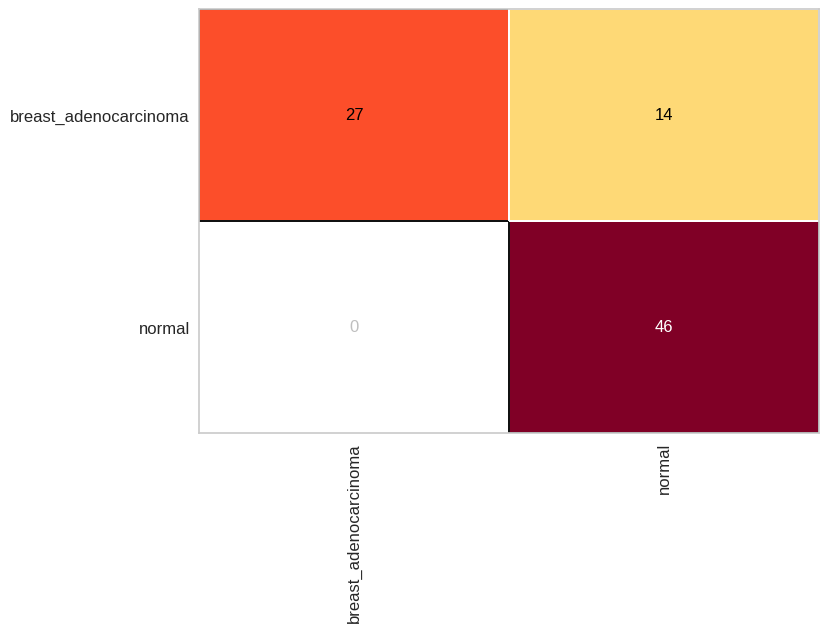

In [99]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_classifier)
cm.fit(X_train, y_train) 
cm.score(X_test, y_test)

In [100]:
print(classification_report(y_test, predictions))

                       precision    recall  f1-score   support

breast_adenocarcinoma       1.00      0.66      0.79        41
               normal       0.77      1.00      0.87        46

             accuracy                           0.84        87
            macro avg       0.88      0.83      0.83        87
         weighted avg       0.88      0.84      0.83        87

